In [58]:
import tensorflow as tf
import pandas as pd
import numpy as np
from pathlib import Path
from tensorflow.keras import layers

import matplotlib.pyplot as plt
%matplotlib inline

# Create train and validation dataframes

In [59]:
root_path = Path('./MURA-v1.1')

train = pd.read_csv(root_path/'train_image_paths.csv', header=None, names=['filename'])
validation = pd.read_csv(root_path/'valid_image_paths.csv', header=None, names=['filename'])

train['class'] = (train.filename.str.extract('(positive|negative)'))
validation['class'] = (train.filename.str.extract('(positive|negative)'))

# Create data generators

In [60]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1. / 255)

train_gen = datagen.flow_from_dataframe(train,
                                        directory=root_path.parent,
                                        target_size=(320, 320),
                                        batch_size=32,
                                        class_mode='binary')
            
valid_gen = datagen.flow_from_dataframe(validation,
                                        directory=root_path.parent,
                                        target_size=(320, 320),
                                        batch_size=32,
                                        class_mode='binary')

Found 36808 validated image filenames belonging to 2 classes.
Found 3197 validated image filenames belonging to 2 classes.


# Build the model

In [61]:
model = tf.keras.Sequential([
    layers.Input(shape=(320,320,3)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [62]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 320, 320, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 160, 160, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 160, 160, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 80, 80, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 80, 80, 64)        36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 409600)            0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)               

# Compile and train

In [63]:
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [30]:
hist = model.fit(train_gen, epochs=3, validation_data=valid_gen)

Epoch 1/3
1151/1151 [==============================] - 4611s 4s/step - loss: 0.6627 - accuracy: 0.6065 - val_loss: 0.9200 - val_accuracy: 0.2452
Epoch 2/3
1151/1151 [==============================] - 4367s 4s/step - loss: 0.6140 - accuracy: 0.6612 - val_loss: 0.9659 - val_accuracy: 0.2856
Epoch 3/3
1151/1151 [==============================] - 4386s 4s/step - loss: 0.4790 - accuracy: 0.7679 - val_loss: 1.1790 - val_accuracy: 0.3616


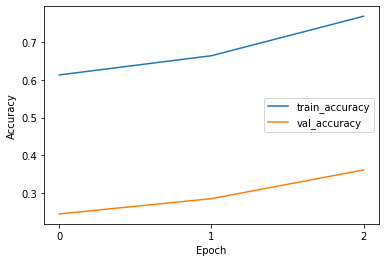

In [64]:
plt.plot(hist.history['accuracy'], label='train_accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='right')
plt.xticks(np.arange(3))

plt.show()

# Save trained model

In [43]:
model.save('simple_CNN')

INFO:tensorflow:Assets written to: simple_CNN/assets
